In [1]:
# Use this cell to begin your analysis, and add as many as you would like!

## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>

<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [2]:
import pandas as pd
apps_with_duplicates = pd.read_csv('/Users/domenicovesia/Desktop/DataCamp/dataCampProject/android_app_market_Google_Play/apps.csv')

#drop duplicates
apps = apps_with_duplicates.drop_duplicates()

#print the total number of apps
print('Total number of apps in dataframe: ', len(apps))

# Print a summary of apps dataframe
print(apps.info())

# Have a look at a random sample of 5 rows
print(apps.head())

Total number of apps in dataframe:  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None
   Unnamed: 0                                                App

## 2. Data cleaning
<p>The four features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. The <code>info()</code> function (from the previous task)  tells us that <code>Installs</code> and <code>Price</code> columns are of type <code>object</code> and not <code>int</code> or <code>float</code> as we would expect. This is because the column contains some characters more than just [0,9] digits. Ideally, we would want these columns to be purely numeric as their name suggests. <br>
<br>
Hence, we now need to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$</code> present in <code>Price</code> column needs to be removed.</p>

In [3]:
chars_to_remove = [',', '+', '$']
cols_to_clean = ['Installs', 'Size', 'Price']


#remove chars and change object type
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).apply(lambda x: x.replace(char, ''))
    apps[col] = apps[col].astype(float)
    

apps.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


# 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

Number of categories = 33 

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


<AxesSubplot:>

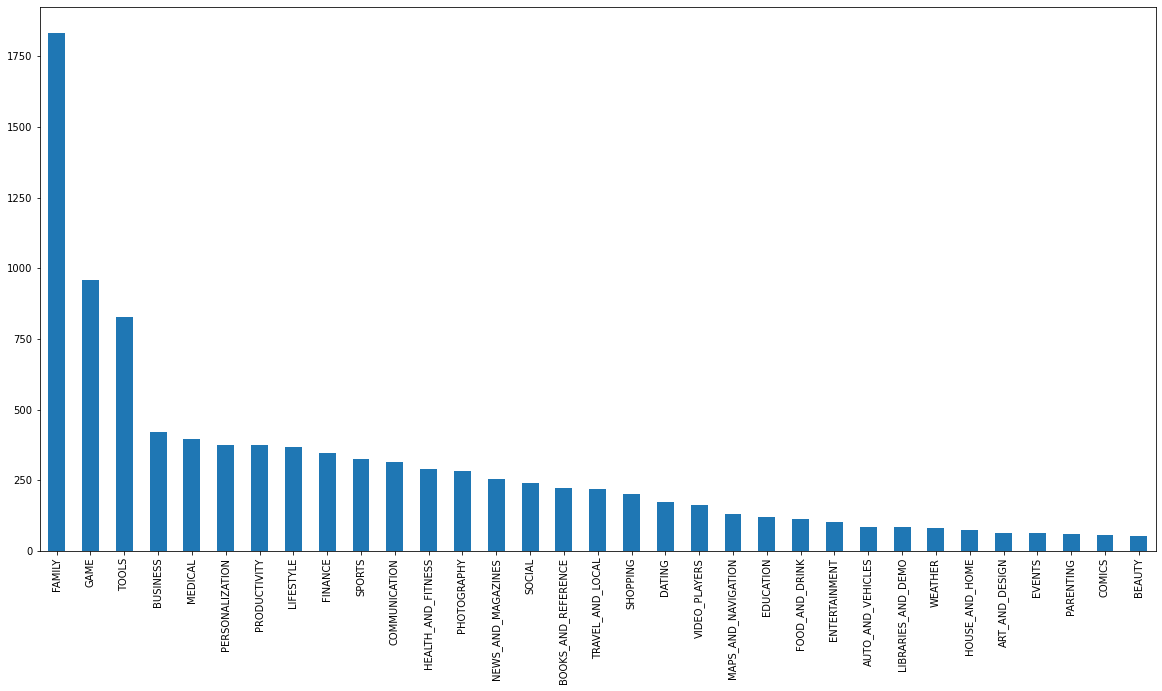

In [4]:
import matplotlib.pyplot as plt

# Print the total number of unique categories
num_categories = apps['Category'].nunique()
print('Number of categories =', num_categories, '\n')

# Count the number of apps in each 'Category'. Sort in descending order depending on number of apps in each category
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)
print(num_apps_in_category)

num_apps_in_category.plot(kind = 'bar', figsize = (20, 10))



## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>From our research, we found that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

Average app rating =  4.17


Text(0, 0.5, 'Number of Apps')

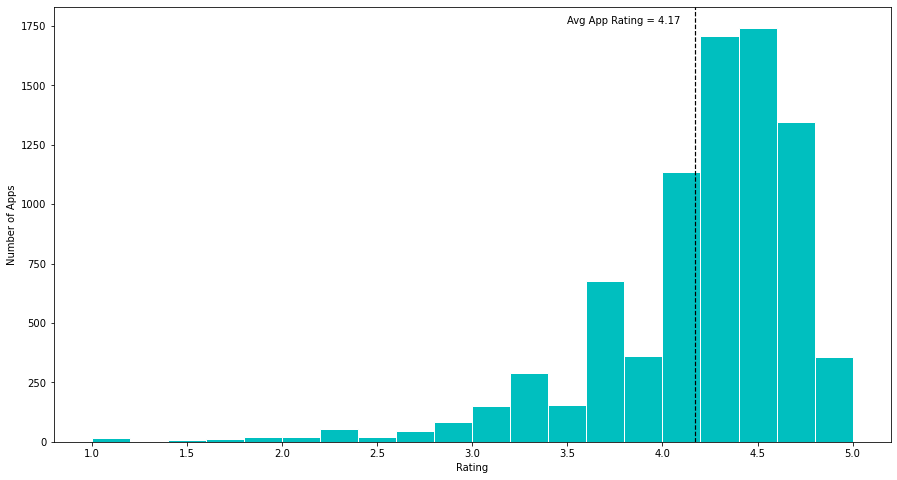

In [5]:
# Average rating of apps
avg_app_rating = round(apps['Rating'].mean(), 2)
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

apps_rating_hist = plt.hist(apps['Rating'], bins=20, color='c', edgecolor='w')
plt.axvline(avg_app_rating, color='k', linestyle='dashed', linewidth=1.2, label=str(avg_app_rating))
plt.text(3.5, 1760, f'Avg App Rating = {avg_app_rating}', weight=500)
plt.xlabel('Rating')
plt.ylabel('Number of Apps')

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

In [6]:
app_category_info = apps.groupby('Category').agg({'App': 'count', 'Price': 'mean', 'Rating': 'mean'}).sort_values(by='App', ascending=False)
app_category_info.rename(columns={"App": "Number of Apps", "Price": "Avg Price", "Rating": "Avg Rating"})


,Number of Apps,Avg Price,Avg Rating
Category,,,
FAMILY,1832,1.309967,4.179664
GAME,959,0.296465,4.247368
TOOLS,827,0.323156,4.039554
BUSINESS,420,0.417357,4.098479
MEDICAL,395,2.520759,4.166552
PERSONALIZATION,376,0.400213,4.332215
PRODUCTIVITY,374,0.670936,4.183389
LIFESTYLE,369,6.398022,4.093355
FINANCE,345,8.408203,4.115563


## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

,Category,App,Price
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
4417,FINANCE,I AM RICH PRO PLUS,399.99
4413,FINANCE,I am Rich,399.99
4408,FINANCE,I am rich (Most expensive app),399.99
4406,FAMILY,I Am Rich Pro,399.99
4403,FINANCE,I am rich(premium),399.99
4402,FINANCE,I am Rich!,399.99
4400,FINANCE,I Am Rich Premium,399.99


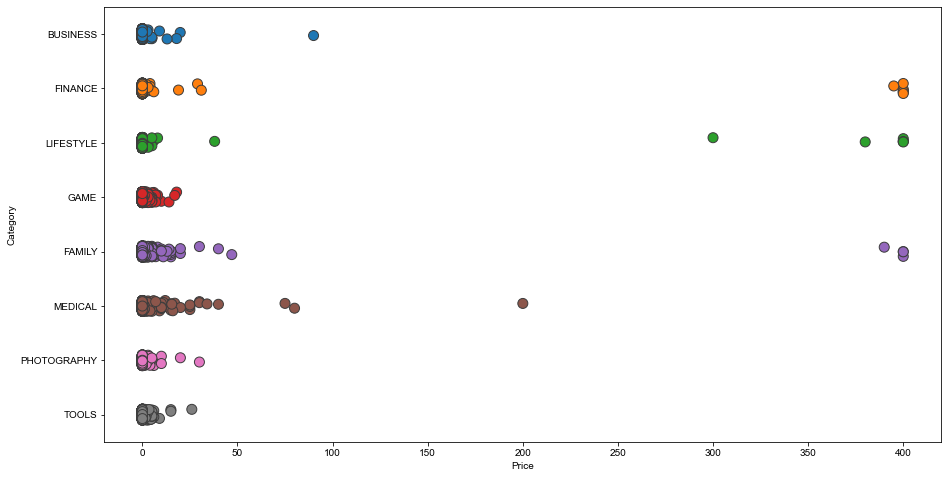

In [7]:
import seaborn as sns

# Select first 10 popular app categories
popular_category = ['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE','BUSINESS']
popular_app = apps[apps.Category.isin(popular_category)]


# Examine the price trend by plotting Price vs Category
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

sns.set_style('darkgrid')
price_trend = sns.stripplot( y = 'Category', x = 'Price', data = popular_app, jitter=True, size=10, linewidth=1, alpha=1)

# Apps whose Price is greater than 200
apps_over_200 = popular_app[popular_app['Price'] > 200][['Category', 'App', 'Price']].sort_values(by='Price', ascending=False)
apps_over_200



## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.</p>

Text(0.5, 1.0, 'Apps under 100$: Price vs Category')

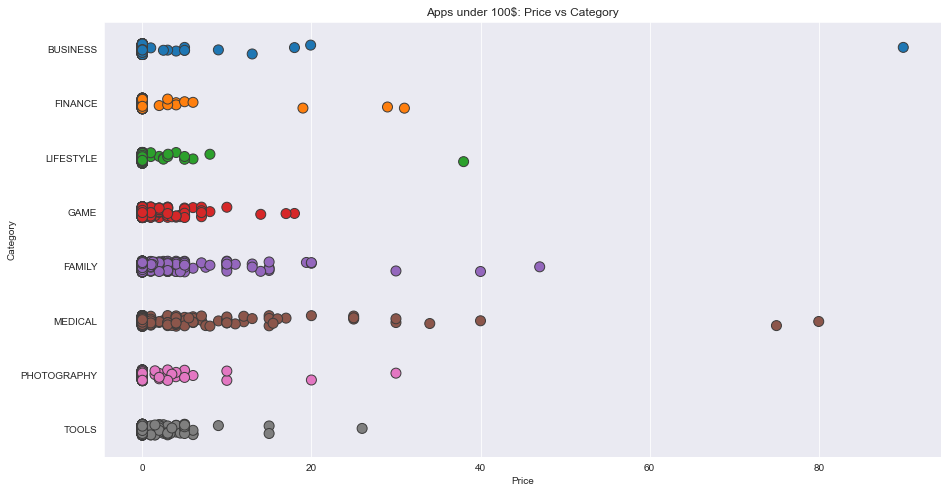

In [8]:
# Select apps priced below $100
apps_under_100 = popular_app[popular_app['Price'] < 100]

# Examine price vs category with the authentic apps (apps_under_100)
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

price_trend_under_100 = sns.stripplot(x='Price', y='Category', data=apps_under_100, size=10, jitter=True, linewidth=1, alpha=1)
price_trend_under_100.set_title('Apps under 100$: Price vs Category')



## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!</p>

In [9]:
free_apps = apps[apps['Type']=='Free']['Installs'].count()
print(f'The number of free apps installed is: {free_apps}')

paid_apps = apps[apps['Type']=='Paid']['Installs'].count()
print(f'The number of paid apps installed is: {paid_apps}')

The number of free apps installed is: 8903
The number of paid apps installed is: 756


In [42]:
import plotly.graph_objects as go

apps['Type'].value_counts()

Free    8903
Paid     756
Name: Type, dtype: int64

In [46]:
free = apps['Installs'][apps['Type'] == 'Free']
paid = apps['Installs'][apps['Type'] == 'Paid']

In [48]:
trace0 = go.Box(
    y = free,
    name = 'Free'
)

trace1 = go.Box(
    y = paid,
    name = 'Paid'
)

In [52]:
data = [trace0, trace1]

In [55]:
fig = go.Figure(data = data)
fig.show()

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

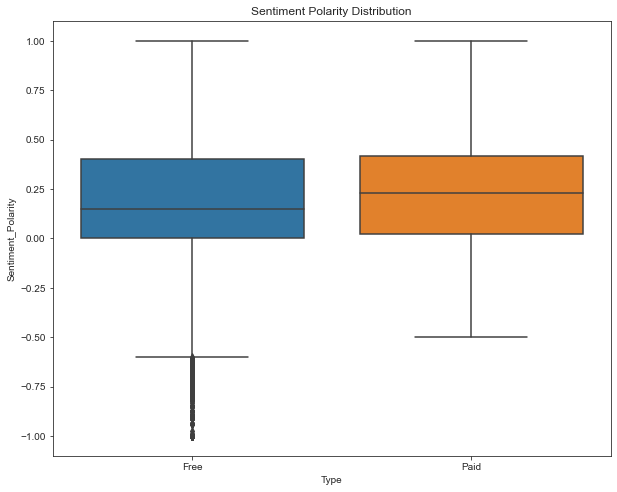

In [72]:
# Load user_reviews.csv
reviews = pd.read_csv('/Users/domenicovesia/Desktop/DataCamp/dataCampProject/android_app_market_Google_Play/user_reviews.csv')

# Join and merge the two dataframe
apps_reviews = pd.merge(apps, reviews, on='App', how='inner')

# Drop NA values from Sentiment and Translated_Review columns
apps_reviews = apps_reviews.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = apps_reviews)
ax.set_title('Sentiment Polarity Distribution')

## 1. Introduction
<p><img src="https://assets.datacamp.com/production/project_1197/img/google_play_store.png" alt="Google Play logo"></p>
<p>Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market<sup><a href="https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009">[1]</a></sup>. </p>
<p>The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.</p>
<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play </li>

</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
<ul>
    <li><b>App:</b> Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file</li>
    <li><b>Review:</b> The pre-processed user review text</li>
    <li><b>Sentiment Category:</b> Sentiment category of the user review - Positive, Negative or Neutral</li>
    <li><b>Sentiment Score:</b> Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.</li>

</ul>
</div>
<p>From here on, it will be your task to explore and manipulate the data until you are able to answer the three questions described in the instructions panel.<br></p>